In [1]:
import LCMGP
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import GPy
import numpy as np
from matplotlib import pyplot as plt

 /home/sudhanshu/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.


In [7]:
import LCMGP
from sklearn import metrics
import GPy
import numpy as np
from matplotlib import pyplot as plt

## Steps:
IN this experiment we compare cassification accuracy and other scores between multiple models
  - LDA
  - Linear Regression
  - LCMGP
  - Linear SVM ?
- Data used is from synthetic control data set 
- It has both upward slope as well as increasing trend, however here we are testing only on it's capability to learn increasing trend
- Since clustering can be spurious we try to control for that by running each experiment 25 times and then report their averages and variances 

In [32]:
import pickle
f = open("Y_train.pickle","rb")
YBar = (pickle.load(f))
f.close()
f = open("L_train.pickle","rb")
L = (pickle.load(f))
f.close()
f = open("Y_test.pickle","rb")
Y_test = (pickle.load(f))
f.close()
f = open("L_test.pickle","rb")
L_test = (pickle.load(f))
f.close()

This is from synthetic control data set, Even though it has upward slope as well as increasing trend we firsttry to learn only increasing trend

        

### testing Infra:

## Testing the effect of inducing points on classification accuracy

### 1. IN this data, C=1; P=3

In [44]:
Y_train = Y_train.as_matrix()
Y_test = Y_test.as_matrix()
L_train = L_train.as_matrix()
L_test = L_test.as_matrix()


In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(YBar,L)
result = lr.predict(Y_test)
print metrics.f1_score(y_pred=result,y_true=L_test)
print metrics.accuracy_score(y_pred=result,y_true=L_test)

0.972222222222
0.991666666667


In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(YBar, L).predict(Y_test)
print metrics.f1_score(y_pred=y_pred,y_true=L_test)
print metrics.accuracy_score(y_pred=y_pred,y_true=L_test)

0.942857142857
0.983333333333


In [47]:
lcgm = LCMGP.LCMGP()
lcgm.fit(Y=YBar,L=L,N=60,induction=0.8,iterations=200)
predictions,Expresults, ux = lcgm.predict(Y_test)
print metrics.f1_score(y_pred=predictions,y_true=L_test)
print metrics.accuracy_score(y_pred=predictions,y_true=L_test)

Model initialized with  0.8 induction ratio
200 updates
0.925373134328
0.979166666667


In [48]:
from sklearn import svm
clf = svm.LinearSVC()
y_pred = clf.fit(YBar, L).predict(Y_test)
print metrics.f1_score(y_pred=y_pred,y_true=L_test)
print metrics.accuracy_score(y_pred=y_pred,y_true=L_test)

0.972222222222
0.991666666667


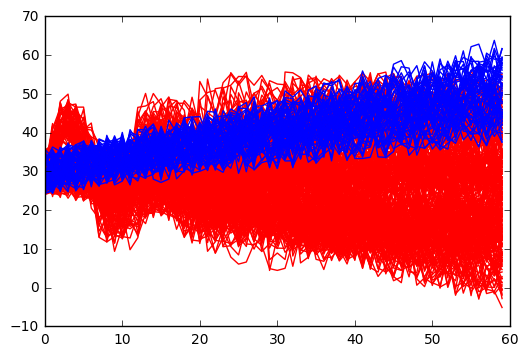

In [34]:
%matplotlib inline
def plotLabel(YBar,L,S):
    for s in range(S):
        if L[s] < 0:
            plt.plot(YBar[s].T,c='r')
    for s in range(S):
        if L[s] > 0:
            plt.plot(YBar[s].T,c='b')
#Y=5*Y
plotLabel(YBar,L,S=YBar.shape[0])

In [43]:
f = open("synthetic_data.pickle","rb")
data = (pickle.load(f))
f.close()
from sklearn.cross_validation import train_test_split
Y_train, Y_test, L_train, L_test = train_test_split(data[data.columns[0:60]], data['Result'], test_size=0.4)


In [53]:
accu = {}
accu['lcmgp']=[]
f1 = {}
f1['lcmgp']=[]
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
logR = LogisticRegression()
linearSVM = svm.LinearSVC()
models = [('logR',logR),
          ('linearSVM',linearSVM),
          ('LDA',lda)
         ]

for times in range(5):
        print times,
        #Data
        Y_train, Y_test, L_train, L_test = train_test_split(data[data.columns[0:60]], data['Result'], test_size=0.4)
        Y_train = Y_train.as_matrix()
        Y_test = Y_test.as_matrix()
        L_train = L_train.as_matrix()
        L_test = L_test.as_matrix()
        # model: our model
        lcgm = LCMGP.LCMGP()
        lcgm.fit(Y=YBar,L=L,N=60,induction=0.7,iterations=150)
        predictions,Expresults, ux = lcgm.predict(Y_test)
        f1s = metrics.f1_score(y_pred=predictions,y_true=L_test)
        accuracy = metrics.accuracy_score(y_pred=predictions,y_true=L_test)
        f1['lcmgp'].append(f1s)
        accu['lcmgp'].append(accuracy)
        # other models
        for m,model in models:
            if m not in f1:
                f1[m]=[]
                accu[m]=[]
            y_pred = model.fit(YBar, L).predict(Y_test)
            f1s = metrics.f1_score(y_pred=y_pred,y_true=L_test)
            accuracy = metrics.accuracy_score(y_pred=y_pred,y_true=L_test)
            f1[m].append(f1s)
            accu[m].append(accuracy)

0 Model initialized with  0.7 induction ratio
150 updates
1 Model initialized with  0.7 induction ratio
150 updates
2 Model initialized with  0.7 induction ratio
150 updates
3 Model initialized with  0.7 induction ratio
150 updates
4 Model initialized with  0.7 induction ratio
150 updates


In [54]:
f1

{'LDA': [0.92957746478873249,
  0.93150684931506844,
  0.93506493506493504,
  0.94736842105263153,
  0.95774647887323949],
 'lcmgp': [0.89855072463768115,
  0.91891891891891897,
  0.93333333333333335,
  0.94736842105263153,
  0.94285714285714284],
 'linearSVM': [0.94444444444444453,
  0.94444444444444453,
  0.96202531645569622,
  0.96296296296296302,
  0.89473684210526316],
 'logR': [0.94444444444444453,
  0.94444444444444453,
  0.96202531645569622,
  1.0,
  0.95774647887323949]}

In [55]:
accu

{'LDA': [0.97916666666666663,
  0.97916666666666663,
  0.97916666666666663,
  0.98333333333333328,
  0.98750000000000004],
 'lcmgp': [0.97083333333333333,
  0.97499999999999998,
  0.97916666666666663,
  0.98333333333333328,
  0.98333333333333328],
 'linearSVM': [0.98333333333333328,
  0.98333333333333328,
  0.98750000000000004,
  0.98750000000000004,
  0.96666666666666667],
 'logR': [0.98333333333333328,
  0.98333333333333328,
  0.98750000000000004,
  1.0,
  0.98750000000000004]}

In [6]:
%matplotlib inline
import numpy as np
def reconstructionError(YBar,uExpBar,phiHatExpBar):
    totalError = 0
    for s in range(YBar.shape[0]):
        totalError += np.sum(np.abs(YBar[s] - uExpBar[s]*phiHatExpBar.T))
    return totalError/YBar.shape[0]

## F1 Scores with respect to inducing point ratio

(0.15, 0.85)

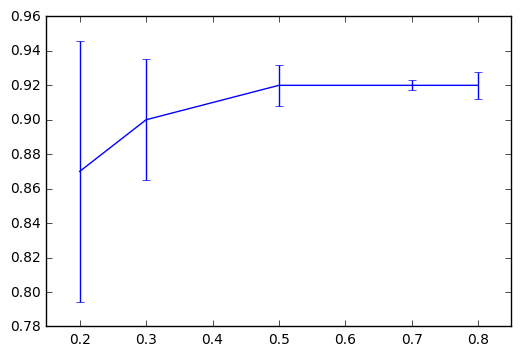

In [66]:
d=[]
for k,v in f1Scores.items():
    d.append((k,np.round(v,2),np.round(f1ScoresV[k],3)))
d = sorted(d, key=lambda x: x[0])  
d = pd.DataFrame(d,columns = ['ind','m','v'])
plt.errorbar(d['ind'],d['m'],d['v'])
plt.xlim(0.15,0.85)

## Accuracies with respect to inducing point ratio

(0.15, 0.85)

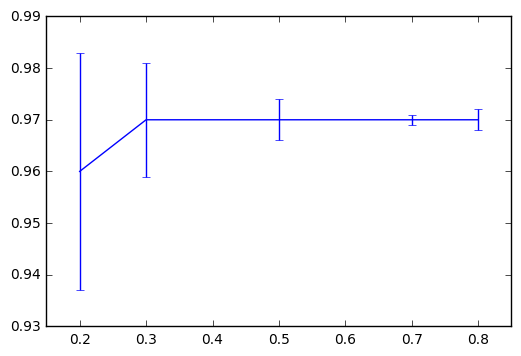

In [67]:
d=[]
for k,v in accuracies.items():
    d.append((k,np.round(v,2),np.round(accuraciesV[k],3)))
d = sorted(d, key=lambda x: x[0])  
d = pd.DataFrame(d,columns = ['ind','m','v'])
plt.errorbar(d['ind'],d['m'],d['v'])
plt.xlim(0.15,0.85)

## Reconstruction errors, test and training

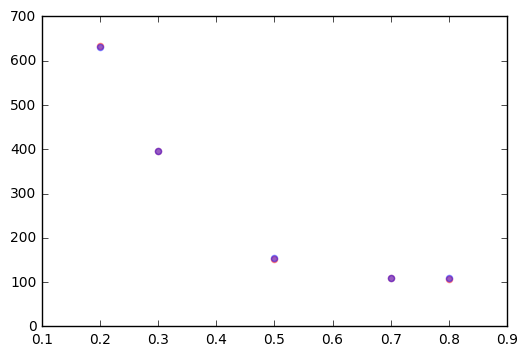

In [68]:
plt.scatter(TTreconstruction.keys(),TTreconstruction.values(),color='red',alpha=0.4)
plt.scatter(TRreconstruction.keys(),TRreconstruction.values(),color='blue',alpha=0.4)

Interesting thing is that even 50% of samples are enough to classify things properly.